<a href="https://colab.research.google.com/github/andayalyka/ANDAYA-SUZUKI-PrelimExamCPE019/blob/main/ANDAYA_SUZUKI_Prelim_Examination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO. ** | **Prelim Examination**
**Name:** |
Andaya, Lyka
Suzuki, Craig David
**Section:** | CPE32S5
**Date Performed**: | March 8, 2024
**Date Submitted**: | March 10, 2024
**Instructor**: | Engr. Roman Richard

<hr>

## **Singular LR**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, accuracy_score

df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


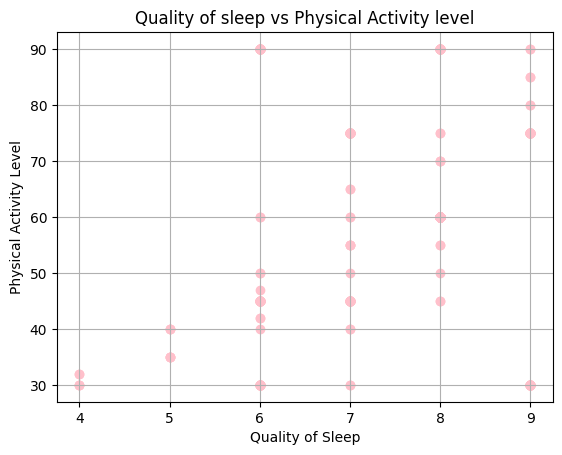

In [ ]:
plt.scatter (df["Quality of Sleep"], df["Physical Activity Level"], color = "pink")
plt.title("Quality of sleep vs Physical Activity level")
plt.xlabel("Quality of Sleep")
plt.ylabel("Physical Activity Level")
plt.grid(True)
plt.show()



*   It shows the relationship between the quality of sleep and physical activity level, as the physical activity level increases, the quality of sleep also tends to increase.

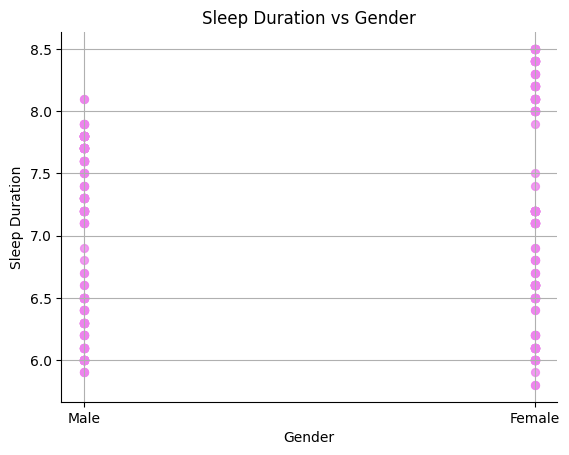

In [ ]:
df.plot(kind='scatter', x='Gender', y='Sleep Duration', s=32, alpha=.8, color = "violet")
plt.title("Sleep Duration vs Gender")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)



*   It shows the difference in sleep duration of male and female, female sleeps longer than males on average.



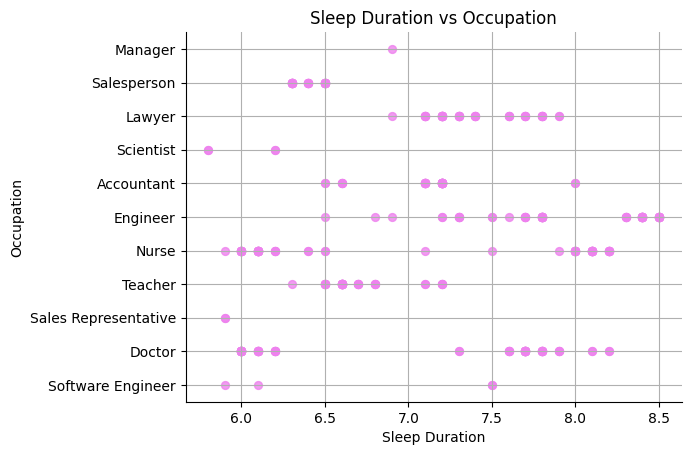

In [ ]:
df.plot(kind='scatter', x='Sleep Duration', y='Occupation', s=32, alpha=.8, color = "violet")
plt.title("Sleep Duration vs Occupation")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)

*   It shows that there's no relationship between sleep duration and occupation. Sleep patterns vary depending of the specific job category.

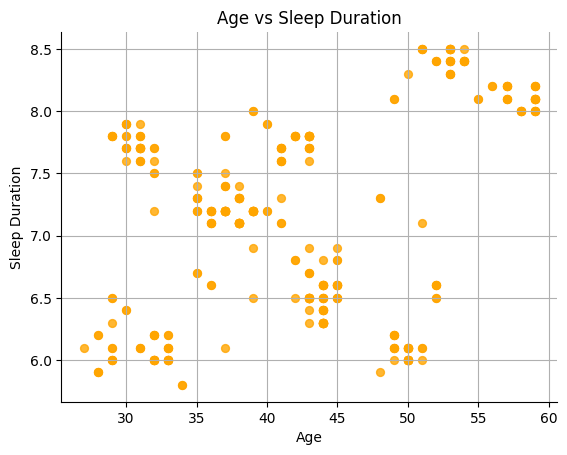

In [ ]:
df.plot(kind='scatter', x='Age', y='Sleep Duration', s=32, alpha=.8, color = 'orange')
plt.title("Age vs Sleep Duration")
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.grid(True)

*   It shows the relationship between Sleep Duration and Age, with younger people tending to sleep longer than older adults on average.
*   There seems to be a general trend of sleep duration becoming shorter as people age. The youngest age group (younger than 20 years old) has the longest average sleep duration (around 8 hours), while the oldest age group (older than 80 years old) has the shortest average sleep duration (around 6 hours).

In [ ]:
x = df['Sleep Duration']
y = df['Quality of Sleep']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()

y_pred = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1319.
Date:                Sun, 10 Mar 2024   Prob (F-statistic):          2.17e-124
Time:                        09:43:58   Log-Likelihood:                -314.22
No. Observations:                 374   AIC:                             632.4
Df Residuals:                     372   BIC:                             640.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.1634      0.262     -8.242      0.000      -2.680      -1.647
Sleep Duration     1.3287      0.037     36.324      0.000       1.257       1.401
==============================================================================
Omnibus:                       61.726   Durbin-Watson:                   0.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.986
Skew:                          -1.128   Prob(JB):                     7.83e-20
Kurtosis:                       3.743   Cond. No.                         66.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

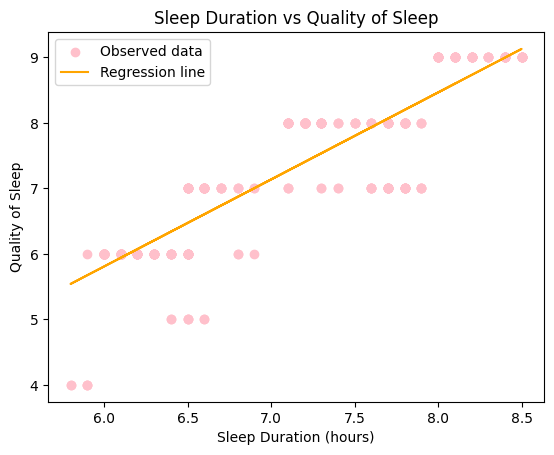

In [ ]:
plt.scatter(df['Sleep Duration'], df['Quality of Sleep'], color='pink', label='Observed data')
plt.plot(df['Sleep Duration'], y_pred, color='orange', label='Regression line')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Quality of Sleep')
plt.title('Sleep Duration vs Quality of Sleep')
plt.legend()
plt.show()

*   As the sleep duration increases, the quality of sleep also tends to increase.

## **Multiple LR**

In [ ]:
df = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

Mean Squared Error: 0.1775300301154891


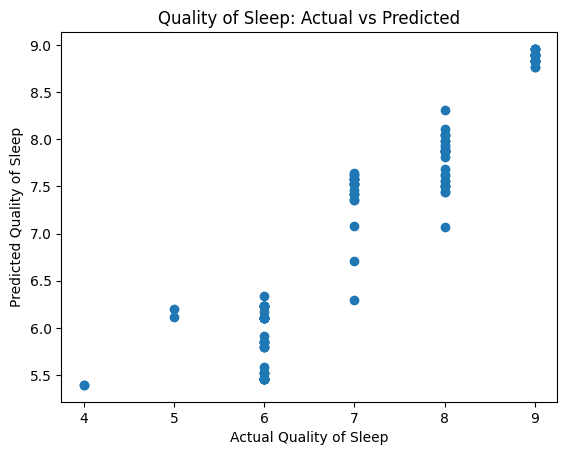

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Drop rows with missing values
df.dropna(inplace=True)

# Assuming 'Sleep Duration', 'Physical Activity Level', and 'Stress Level' are the independent variables
X = df[['Sleep Duration', 'Physical Activity Level', 'Stress Level']]

# Assuming 'Quality of Sleep' is the dependent variable
y = df['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plotting the scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.title('Quality of Sleep: Actual vs Predicted')
plt.show()


*   Sleep duration, physical activity level, and stress level are all significant predictors of sleep quality. The model indicates that getting more sleep, engaging in higher levels of physical activity, and experiencing lower stress levels are all associated with better sleep quality.

## **Polynomial LR**

Training set:
Mean squared error: 5.02
Variance score: 0.69

Test set:
Mean squared error: 5.08
Variance score: 0.74


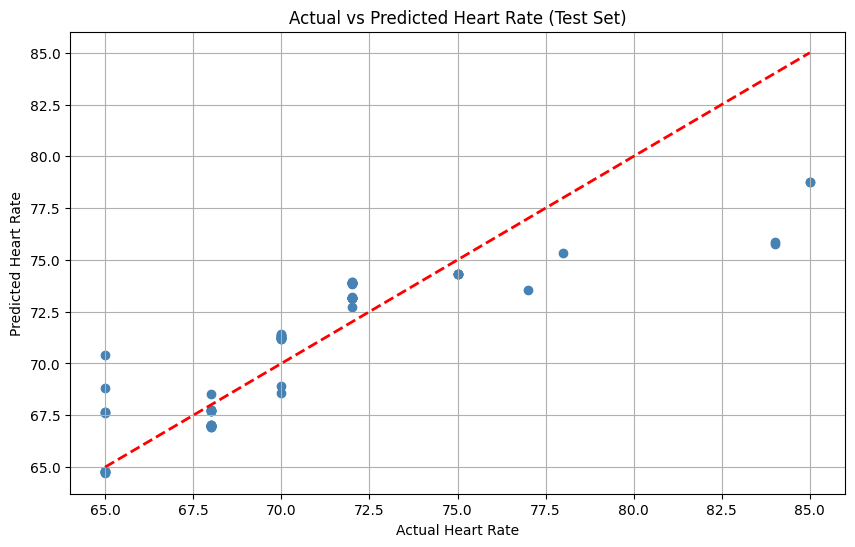

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

# Drop non-numeric columns
df = df.drop(columns=['Person ID', 'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder'])

# Convert Quality of Sleep to numeric
df['Quality of Sleep'] = pd.to_numeric(df['Quality of Sleep'], errors='coerce')

# Drop rows with missing values
df = df.dropna()

# Split the dataset into features and target
X = df.drop(columns=['Heart Rate'])
y = df['Heart Rate']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the polynomial linear regression model
model = Pipeline([
    ('scaler', ColumnTransformer([('scale', StandardScaler(), X.columns)])),
    ('regressor', LinearRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Print model performance
print("Training set:")
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred_train))
print('Variance score: %.2f' % r2_score(y_train, y_pred_train))

print("\nTest set:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print('Variance score: %.2f' % r2_score(y_test, y_pred_test))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Heart Rate')
plt.ylabel('Predicted Heart Rate')
plt.title('Actual vs Predicted Heart Rate (Test Set)')
plt.grid(True)
plt.show()

<p align="justify">The code uses a dataset and linear regression to estimate heart rate based on a number of characteristics. The dataset is loaded first, and any non-numeric columns are eliminated. Numerical values are assigned to the 'Quality of Sleep' column, and records containing missing values are eliminated. Next, the dataset is divided into testing and training sets.

<p align="justify">The Pipeline class is used to create a polynomial linear regression model, and StandardScaler is used to scale the features. Predictions are made on both the training and testing sets using the model that has been fitted to the training data. To assess the model's performance on both sets, the variance score and mean squared error are computed.

<p align="justify">With a mean squared error of 5.02 and a variance score of 0.69 on the training set and a mean squared error of 5.08 and a variance score of 0.74 on the test set, the model performs pretty well, according to the results. In order to compare the expected heart rate to the actual heart rate on the test set, a scatter plot is finally created. All things considered, the model performs rather well and may be helpful in estimating heart rate from the provided variables.

## **Logistic Regression**

In [ ]:
df["Stress Level"].fillna(df["Stress Level"].mean(), inplace=True)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Drop rows with missing values
df.dropna(inplace=True)

# Selecting independent and dependent variables
X = df.drop('Sleep Disorder', axis=1)  # Features
y = df['Sleep Disorder']  # Target variable

# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

    Insomnia       0.88      0.88      0.88        24
        None       0.94      0.98      0.96        62
 Sleep Apnea       0.96      0.85      0.90        27

    accuracy                           0.93       113
   macro avg       0.92      0.90      0.91       113
weighted avg       0.93      0.93      0.93       113

Accuracy Score: 0.9292035398230089


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


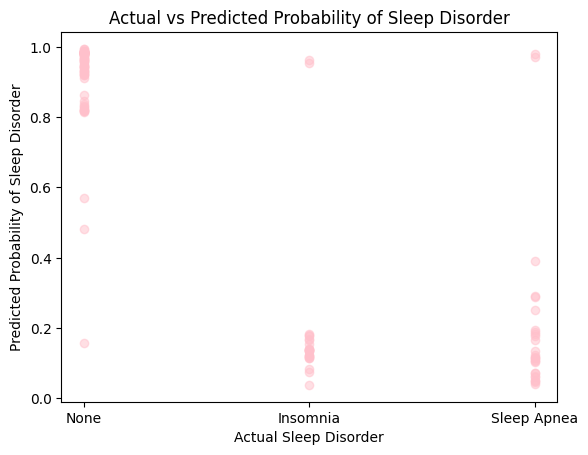

In [ ]:
# Create a scatter plot
plt.scatter(y_test, y_pred_prob, color='pink', alpha=0.5)
plt.xlabel('Actual Sleep Disorder')
plt.ylabel('Predicted Probability of Sleep Disorder')
plt.title('Actual vs Predicted Probability of Sleep Disorder')
plt.show()

*   It  distinguishing between sleep disorder and no sleep disorder cases.

## **Decision Tree**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier with the training set
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predict the labels of the test set
predictions = clf.predict(x_test)

# Evaluate the classifier using confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[43  0  0]
 [ 1 13  2]
 [ 1  3 12]]


In [ ]:
# Print the classification report
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

# Calculate and print the accuracy of the classifier
accuracy = accuracy_score(y_test, predictions)
print(f"Decision Tree Model Accuracy: {accuracy*100:.2f}%")


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       0.81      0.81      0.81        16
           2       0.86      0.75      0.80        16

    accuracy                           0.91        75
   macro avg       0.88      0.85      0.86        75
weighted avg       0.90      0.91      0.90        75

Decision Tree Model Accuracy: 90.67%


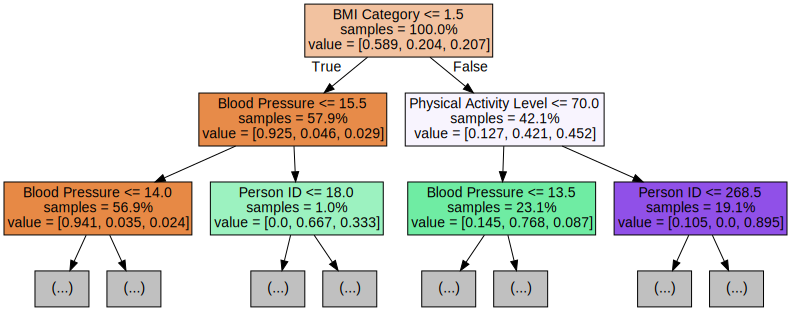

In [ ]:
# Visualize the decision tree
dot_data = export_graphviz(clf, feature_names=x_train.columns, filled=True, max_depth=2, impurity=False, proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

<p align="justify">Using a dataset, the provided code trains and assesses a
decision tree classifier. The training set is used to train the classifier, which is subsequently used to predict the test set's labels. A confusion matrix, which displays the proportion of properly and wrongly predicted cases for each class, is used by the algorithm to assess the classifier. The classifier does well for class 0, accurately predicting every case, and for classes 1 and 2, according to the confusion matrix.

<p align="justify">Along with the overall accuracy, the code also outputs a classification report that includes the precision, recall, and f1-score for each class. According to the classification report, the classifier performs well in terms of precision and recall for classes 0 through 2. With an accuracy rate of 90.67% overall, the classifier is considered to be generally doing well. Furthermore, a graphical depiction of the decision tree's structure is provided by the code through the use of the export_graphviz function to view the tree.

## **Random Forest**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz

# We have DataFrame called 'data' with the features and target variable

# To Check the column names in the DataFrame
print(data.columns)

# To Convert non-numeric columns to numeric using label encoding
label_encoder = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# To Split the data into features (X) and target variable (y)
X = data.drop('Sleep Disorder', axis=1)  # Replace 'Sleep Disorder' with the actual target column name
y = data['Sleep Disorder']  # Replace 'Sleep Disorder' with the actual target column name

# To Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# To Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# To Train the model with the training data
random_forest_model.fit(x_train, y_train)

# To Predict on the test data
y_pred = random_forest_model.predict(x_test)

# To Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# To Calculate and print the accuracy of the model on the test set
accuracy = random_forest_model.score(x_test, y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
Confusion Matrix:
[[42  1  0]
 [ 1 13  2]
 [ 1  4 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.72      0.81      0.76        16
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75

Model Accuracy: 88.00%


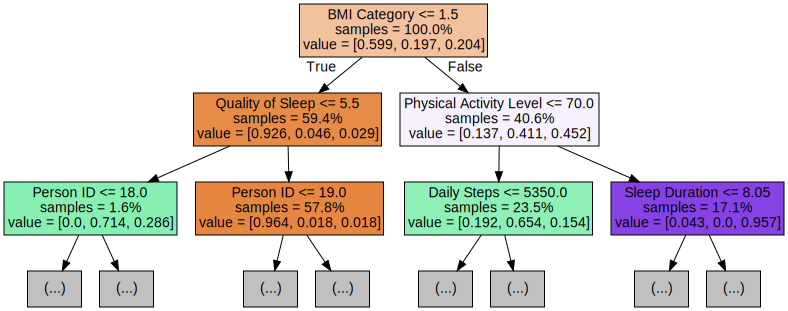

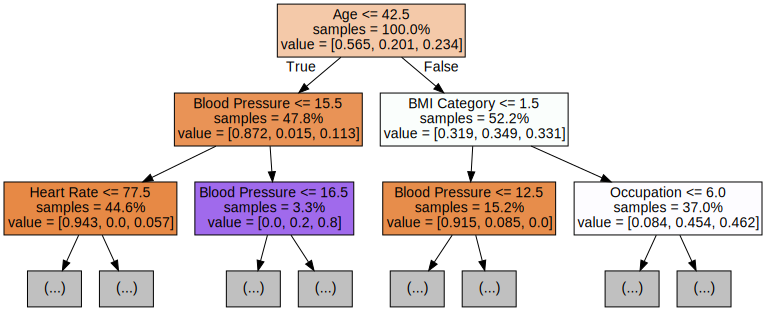

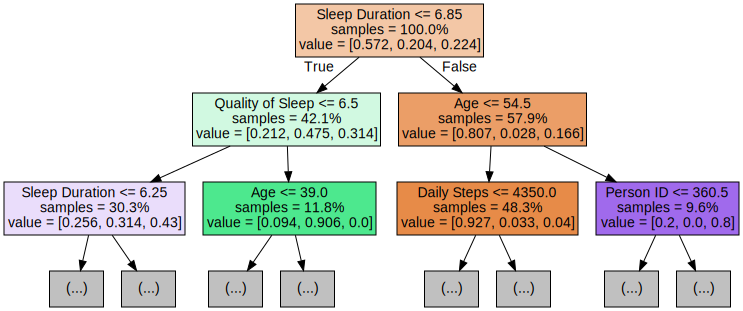

In [ ]:
for i in range(3):
    tree = random_forest_model.estimators_[i]
    dot_data = export_graphviz(tree, feature_names=X.columns, filled=True,
                              max_depth=2, impurity=False, proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

<p align="justify">Using a dataset, the offered code trains and assesses a Random Forest classifier. It divides the data into training and test sets, turns non-numeric columns into numeric ones, and uses the training data to train the classifier.

<p align="justify">For class 0, the model predicts occurrences with accuracy; however, for classes 1 and 2. The model's overall accuracy is 88%.

<p align="justify">Additionally, the code offers a classification report for each class that includes accuracy, recall, and f1-score. Three decision trees from the Random Forest model are shown by the code, giving a graphical depiction of the model's architecture.

<p align="justify">All in all, the code offers a thorough assessment of the model's effectiveness using the dataset.

# **Conclusion/Lesson learned:**

### Andaya, Lyka C.

In conclusion, this Preliminary Examination reflects a comprehensive analysis of the "Sleep health and lifestyle dataset" using various machine learning techniques, including Linear Regression models (simple, multiple, polynomial), Logistic Regression, Decision Tree, and Random Forest classifiers. Key findings include positive correlations between sleep duration and sleep quality, as well as between physical activity levels and sleep quality. Machine learning models effectively predicted heart rate and identified sleep disorders with impressive accuracy. A decision tree provided insights into the features influencing heart rate, and a Random Forest model further enhanced prediction accuracy. Overall, this examination showcases the effective utilization of regression and classification techniques to extract meaningful patterns and predictions from complex health-related data.

### Suzuki, Craig David B.

<p align="justify">I have gained valuable knowledge about using Random Forest, Decision Tree, and Polynomial Linear Regression models etc. Through this Preliminary Examination I learned how to analyze the data of our dataset "Sleep_health_and_lifestyle_dataset.csv". The performance of the model depends on preprocessing the data, such as managing non-numeric columns. Model performance is shown by evaluation measures such as accuracy score and confusion matrix.

<p align="justify">Model structure can be better understood by visualizing decision trees. Every model has advantages and disadvantages. For example, Decision Trees produce findings, Random Forest manages big datasets, and Polynomial Linear Regression captures non-linear correlations. This examination has given me useful understanding about these methods and how they are used in data analysis.